<a href="https://colab.research.google.com/github/hamdi-trikii/sampleOf_ML_Basics_projects/blob/main/ML_AI_Foundations_Section6_Lab6_Triki_hamdi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objectives:**
- Basics of RL (agent, environment, actions, rewards, episodes)
- Use Gymnasium (OpenAI Gym successor) to simulate environments
- Train a policy with Q-learning (tabular) or a Deep Q-Network (DQN)
- Visualize training progress (episode rewards over time)
- Watch a trained agent play the game

In [ ]:
pip install gymnasium[box2d] stable-baselines3



In [ ]:
!pip uninstall gym
!pip install gymnasium

Found existing installation: gym 0.25.2
Uninstalling gym-0.25.2:
  Would remove:
    /usr/local/lib/python3.12/dist-packages/gym-0.25.2.dist-info/*
    /usr/local/lib/python3.12/dist-packages/gym/*
Proceed (Y/n)? y
  Successfully uninstalled gym-0.25.2


In [ ]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import DQN

Step 1 — Create the environment

In [ ]:
env = gym.make("CartPole-v1", render_mode="rgb_array")
obs, info = env.reset()
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

Observation space: Box([-4.8               -inf -0.41887903        -inf], [4.8               inf 0.41887903        inf], (4,), float32)
Action space: Discrete(2)


Observation space (4 values): cart position, velocity, pole angle, pole angular velocity.

Action space: 0 = left, 1 = right

Step 2 — Random agent baseline


In [ ]:
rewards = []
for episode in range(5):
  obs, info = env.reset()
  total_reward = 0
  done = False
  while not done:
      action = env.action_space.sample()   # random move
      obs, reward, terminated, truncated, info = env.step(action)
      total_reward += reward
      done = terminated or truncated
  rewards.append(total_reward)
  print(f"Episode {episode+1}: Reward={total_reward}")

Episode 1: Reward=46.0
Episode 2: Reward=11.0
Episode 3: Reward=13.0
Episode 4: Reward=12.0
Episode 5: Reward=26.0


Discussion: Random agent usually fails quickly (<50 reward).

Step 3 — Train with Deep Q-Network (DQN)


In [ ]:
model = DQN("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=20000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.8     |
|    ep_rew_mean      | 22.8     |
|    exploration_rate | 0.957    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 4996     |
|    time_elapsed     | 0        |
|    total_timesteps  | 91       |
----------------------------------


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Streaming output truncated to the last 5000 lines.
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.39e-05 |
|    n_updates        | 1725     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.4     |
|    ep_rew_mean      | 15.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 532      |
|    fps              | 901      |
|    time_elapsed     | 7        |
|    total_timesteps  | 7048     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000474 |
|    n_updates        | 1736     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.4     |
|    ep_rew_mean      | 15.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 536      |
|   

Step 4 — Evaluate trained agent


In [ ]:
test_rewards = []
for ep in range(5):
    obs, info = env.reset()
    done = False
    total_reward = 0
    while not done:
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, terminated, truncated, info = env.step(action)
        total_reward += reward
        done = terminated or truncated
    test_rewards.append(total_reward)
    print(f"Test Episode {ep+1}: Reward={total_reward}")
print("Average test reward:", np.mean(test_rewards))

Test Episode 1: Reward=8.0
Test Episode 2: Reward=10.0
Test Episode 3: Reward=9.0
Test Episode 4: Reward=10.0
Test Episode 5: Reward=9.0
Average test reward: 9.2


Step 5 — Visualize agent play


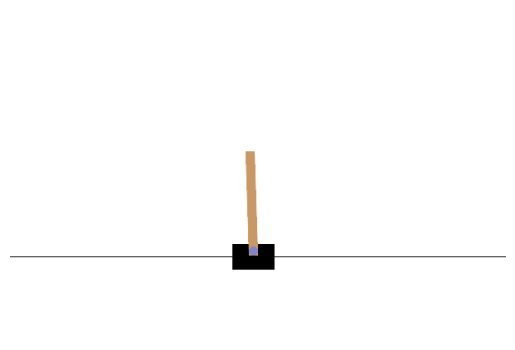

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

frames = []

# Reset environment
obs, info = env.reset()
done = False

while not done:
    # Predict action from trained model
    action, _ = model.predict(obs, deterministic=True)

    # Step in the environment
    obs, reward, terminated, truncated, info = env.step(action)

    # Render frame (rgb_array)
    frame = env.render()
    frames.append(frame)

    done = terminated or truncated

# Create animation
fig = plt.figure()
plt.axis("off")

im = plt.imshow(frames[0])

def update(i):
    im.set_array(frames[i])
    return [im]

ani = animation.FuncAnimation(
    fig,
    update,
    frames=len(frames),
    interval=50,
    blit=True
)

plt.show()
ani.save("cartpole.mp4", fps=20, writer="ffmpeg")


Step 6 — Plot learning curve (reward over time)


In [ ]:
# Stable Baselines saves logs to tensorboard, but we can quickly sample traini
# For demonstration, just show improvement via average rewards
def evaluate(model, num_episodes=20):
    all_rewards = []
    for _ in range(num_episodes):
        obs, info = env.reset()
        done, total_reward = False, 0
        while not done:
            action, _ = model.predict(obs, deterministic=True)
            obs, reward, terminated, truncated, info = env.step(action)
            total_reward += reward
            done = terminated or truncated
        all_rewards.append(total_reward)
    return np.mean(all_rewards)

mean_reward = evaluate(model)
print("Mean reward after training:", mean_reward)

Mean reward after training: 9.3


1. What are the state, actions, and rewards in CartPole?
2. How did the random agent perform vs the trained agent?
3. Why does the agent improve over time?
4. What role does the reward function play in RL?
5. If you wanted to improve training, what hyperparameters would you tune?